In [4]:
### Airbnb Seattle Data Analysis ###

In [5]:
#Questions:

#Q1: Which areas are more mob and expensive ?
#Q2: How much prices spikes in the busiest time of the year ?
#Q3: Whhic features will be more helpful in predicting price in that area ?

In [6]:
#How much prices spikes in the busiest time of the year ?

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize
from numpy.random import rand

%matplotlib inline

In [15]:
df_listings = pd.read_csv('data/listings.csv',sep=',')

# Dimension of Data
print(df_listings.shape)
# print(df_listings.info())

(3818, 92)


In [16]:
# new dataframe with required columns
columns_required=['id','neighbourhood_group_cleansed','price']
df_listings= pd.DataFrame(data=df_listings, index=df_listings.index, columns=columns_required) 
df_listings.head()

,id,neighbourhood_group_cleansed,price
0,241032,Queen Anne,$85.00
1,953595,Queen Anne,$150.00
2,3308979,Queen Anne,$975.00
3,7421966,Queen Anne,$100.00
4,278830,Queen Anne,$450.00


In [21]:
# Change the price to float
df_listings['price']= pd.to_numeric(listings_df_clean['price'].str.translate({ord(i): None for i in '$,'}))

# Missing records in each column
print("Missing Records\n",df_listings.isnull().sum().sort_values(ascending=False))

Missing Records
 price                           0
neighbourhood_group_cleansed    0
id                              0
dtype: int64


In [23]:
# Average price for each near by group
nearby_groups_price=df_listings.groupby(['neighbourhood_group_cleansed'])['price'].mean()

# Sort values
nearby_groups_price=nearby_groups_price.sort_values(ascending=False)
print("Average Price for each nearby group:\n",nearby_groups_price)

Average Price for each nearby group:
 neighbourhood_group_cleansed
Magnolia               177.672131
Queen Anne             157.223729
Downtown               154.405660
West Seattle           141.359606
Cascade                140.101124
Capitol Hill           130.592593
Central Area           128.338753
Ballard                124.682609
Other neighborhoods    119.968514
Interbay               109.727273
Seward Park            108.477273
Beacon Hill             94.669492
University District     93.639344
Lake City               92.671642
Rainier Valley          91.899371
Northgate               88.550000
Delridge                83.278481
Name: price, dtype: float64


In [25]:
# statistical information
nearby_groups_price.describe()

count     17.000000
mean     119.838682
std       27.847598
min       83.278481
25%       93.639344
50%      119.968514
75%      140.101124
max      177.672131
Name: price, dtype: float64

In [30]:
# By analysing statistical info le consider neighbourhood with avergae price over 140 to be expensive (above 75% of data)
highPrice_nearby_group=nearby_groups_price[nearby_groups_price>140]

highPrice_nearby_group=highPrice_nearby_group.index.tolist()
print("High price neighbourhood:\n",highPrice_nearby_group)

# Now consider neighbourhood with avergae price under 93 to be cheap (under 25% of data)
lowPrice_nearby_group=nearby_groups_price[nearby_groups_price<93]

# Get names of high price months
lowPrice_nearby_group=lowPrice_nearby_group.index.tolist()
print("\nLow price neighbourhood:\n",lowPrice_nearby_group)

High price neighbourhood:
 ['Magnolia', 'Queen Anne', 'Downtown', 'West Seattle', 'Cascade']

Low price neighbourhood:
 ['Lake City', 'Rainier Valley', 'Northgate', 'Delridge']


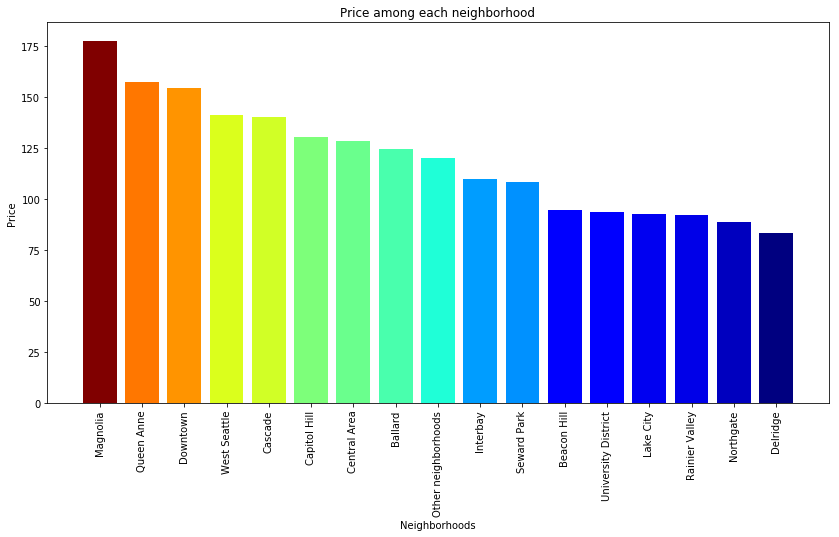

In [51]:
# Plot the average price per neighbourhoods

# Get a color map
my_cmap = cm.get_cmap('jet')
my_norm = Normalize()

plt.figure(figsize=(14,7))
plt.bar(nearby_groups_price.index,nearby_groups_price,color=my_cmap(my_norm(nearby_groups_price.values)))
plt.xticks(rotation=90)
plt.xlabel('Neighborhoods')
plt.ylabel('Price')
plt.title('Price among each neighborhood')
plt.show()

In [46]:
# average number of listings for each neighbourhood group
popular_nearby_group=df_listings.groupby(['neighbourhood_group_cleansed'])['id'].count()/df_listings.shape[0]

# Sort values
popular_nearby_group=popular_nearby_group.sort_values(ascending=False)
print("Popular listings:\n",popular_nearby_group)

Popular listings:
 neighbourhood_group_cleansed
Other neighborhoods    0.207962
Capitol Hill           0.148507
Downtown               0.138816
Central Area           0.096647
Queen Anne             0.077266
Ballard                0.060241
West Seattle           0.053169
Rainier Valley         0.041645
University District    0.031954
Beacon Hill            0.030906
Cascade                0.023311
Northgate              0.020953
Delridge               0.020691
Lake City              0.017548
Magnolia               0.015977
Seward Park            0.011524
Interbay               0.002881
Name: id, dtype: float64


In [47]:
# statistical information
popular_nearby_group.describe()

count    17.000000
mean      0.058824
std       0.057739
min       0.002881
25%       0.020691
50%       0.031954
75%       0.077266
max       0.207962
Name: id, dtype: float64

In [49]:
# By analysing statistical info consider neighbourhood with average number of listings over 0.08 to be popular (above 75% of data)
popular_neighbourhood=popular_nearby_group[popular_nearby_group>0.08]

# Get names of high price months
popular_neighbourhood=popular_neighbourhood.index.tolist()
print("Most popular neighbourhood:\n",popular_neighbourhood)

# Now consider neighbourhood with The average number of listings under 0.02 to be unpopular (under 25% of data)
unpopular_neighbourhood=popular_nearby_group[popular_nearby_group<0.02]

# Get names of high price months
unpopular_neighbourhood=unpopular_neighbourhood.index.tolist()
print("\nLess popular neighbourhood:\n",unpopular_neighbourhood)

Most popular neighbourhood:
 ['Other neighborhoods', 'Capitol Hill', 'Downtown', 'Central Area']

Less popular neighbourhood:
 ['Lake City', 'Magnolia', 'Seward Park', 'Interbay']


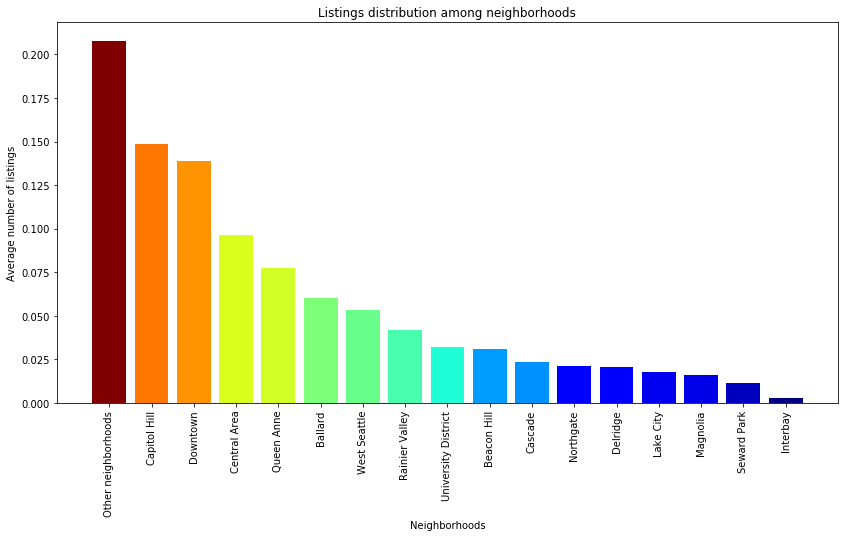

In [52]:
# Plot Average number of listings per neighbourhoods

# Get a color map
my_cmap = cm.get_cmap('jet')
my_norm = Normalize()

plt.figure(figsize=(14,7))
plt.bar(popular_nearby_group.index,popular_nearby_group,color=my_cmap(my_norm(nearby_groups_price.values)))
plt.xticks(rotation=90)
plt.xlabel('Neighborhoods')
plt.ylabel('Average number of listings')
plt.title('Listings distribution among neighborhoods')
plt.show()

In [55]:
print("expensive and crowded neighbourhood:",list(set(highPrice_nearby_group) & set(popular_neighbourhood)))
print("expensive and crowded neighbourhood:",list(set(highPrice_nearby_group) & set(unpopular_neighbourhood)))

print("cheap and crowded neighbourhood:",list(set(lowPrice_nearby_group) & set(popular_neighbourhood)))
print("expensive and crowded neighbourhood:",list(set(lowPrice_nearby_group) & set(unpopular_neighbourhood)))


expensive and crowded neighbourhood: ['Downtown']
expensive and crowded neighbourhood: ['Magnolia']
cheap and crowded neighbourhood: []
expensive and crowded neighbourhood: ['Lake City']


In [16]:
#Q2 How much prices spikes in the busiest time of the year ?

In [134]:
# Load calendar data.
df_calender = pd.read_csv('data/calendar.csv',sep=',')

# Dimension of data
print("Data dimension:",df_calender.shape)

# Check duplicate records
print("Duplicate records:",df_calender.duplicated().sum())

Data dimension: (1393570, 4)
Duplicate records: 0


In [135]:
# update the type of price
df_calender['price']= pd.to_numeric(df_calender['price'].str.translate({ord(i): None for i in '$,'}))

# update the type of date
df_calender['date']= pd.to_datetime(df_calender['date'],errors = 'ignore', format = '%Y-%m-%d')

print("Data types:\n",df_calender.dtypes)

Data types:
 listing_id             int64
date          datetime64[ns]
available             object
price                float64
dtype: object


In [136]:
# averag missing data
print("Missing average:\n",df_calender.isnull().mean().sort_values(ascending=False))

# Drop null values
df_calender = df_calender.dropna(subset=['price'], axis=0) 
print("After dropping null values, Records:",df_calender.shape)

Missing average:
 price         0.32939
available     0.00000
date          0.00000
listing_id    0.00000
dtype: float64
After dropping null values, Records: (934542, 4)


In [137]:
# Convert true value 't' to 1 
df_calender.loc[df_calender['available']=='t','available']='1'

# add new features
df_calender['year'] = df_calender['date'].dt.year
df_calender['month'] = df_calender['date'].dt.month
df_calender['day'] = df_calender['date'].dt.day

print("Available months in each year:\n",df_calender.groupby(['year'])['month'].unique())

df_calender_2016=df_calender[df_calender['year']==2016]
df_calender_2016.head()

Available months in each year:
 year
2016    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2017                                        [1]
Name: month, dtype: object


,listing_id,date,available,price,year,month,day
0,241032,2016-01-04,1,85.0,2016,1,4
1,241032,2016-01-05,1,85.0,2016,1,5
9,241032,2016-01-13,1,85.0,2016,1,13
10,241032,2016-01-14,1,85.0,2016,1,14
14,241032,2016-01-18,1,85.0,2016,1,18


In [140]:
# availability for each month in 2016
avlb_month=df_calender_2016.groupby(['month'])['available'].count()/df_calender_2016.shape[0]

# print("Average of available months:\n",avlb_month.sort_values(ascending=False))

In [141]:
# statistical information
avlb_month.describe()

count    12.000000
mean      0.083333
std       0.007591
min       0.063777
25%       0.081373
50%       0.083163
75%       0.088222
max       0.093730
Name: available, dtype: float64

In [147]:
# by analysing statistical info consider the month with average amount of available over 0.0883 to be active (above 75% of data)
active_months=avlb_month[avlb_month>0.0883]
print("Most available/active months:",active_months.index.tolist())

# now consider the months with average amount of available under 0.081 to be inactive (below 25% of data)
inactive_months=avlb_month[avlb_month<0.081]
print("inactive months:",inactive_months.index.tolist())

Most available/active months: [3, 10, 12]
inactive months: [1, 2, 7]


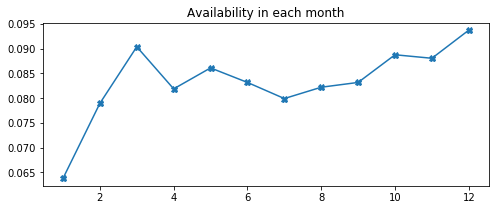

In [148]:
# check availability 
plt.figure(figsize=(8,3))
plt.plot(avlb_month,'X-')
plt.title("Availability in each month")
plt.show()


In [157]:
# make a datframe with active months
df_active_months=df_calender_2016[df_calender_2016['month'].isin(active_months.index)] 
# availability for each day
active_avb_day=df_active_months.groupby(['day'])['available'].count()/df_active_months.shape[0]

# print("Available active days:\n",active_avb_day.sort_values(ascending=False))

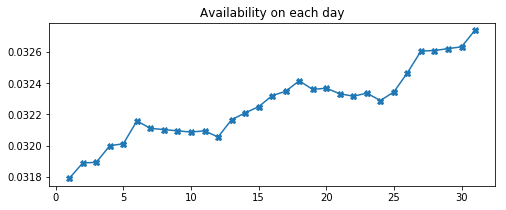

In [158]:
# check availability on each day
plt.figure(figsize=(8,3))
plt.plot(active_avb_day,'X-')
plt.title("Availability on each day")
plt.show()

In [164]:
# make a datframe for inactive months
df_inactive_months=df_calender_2016[df_calender_2016['month'].isin(inactive_months.index)] 
# availability for each day
inactive_avb_day=df_calender_2016.groupby(['day'])['available'].count()/df_inactive_months.shape[0]

# print("Available active days:\n",inactive_avb_day.sort_values(ascending=False))

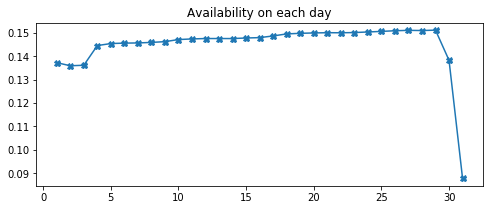

In [165]:
# check availability on each day
plt.figure(figsize=(8,3))
plt.plot(inactive_avb_day,'X-')
plt.title("Availability on each day")
plt.show()

In [166]:
# Check the price trend
month_price=df_calender_2016.groupby(['month'])['price'].mean()

print('Average price by each month:\n',month_price.sort_values(ascending=False))

Average price by each month:
 month
7     152.094150
8     150.656594
6     147.473137
9     143.255949
5     139.538183
12    137.251835
10    137.031939
11    135.688738
4     135.097005
3     128.644488
2     124.293927
1     121.568409
Name: price, dtype: float64


In [167]:
# statistical information
month_price.describe()

count     12.000000
mean     137.716196
std        9.715239
min      121.568409
25%      133.483876
50%      137.141887
75%      144.310246
max      152.094150
Name: price, dtype: float64

In [168]:
# by analysing statistical info consider months with avergae price over 144 to be expensive (above 75% of data)
high_price_months=month_price[month_price>144]
print('High price months:',high_price_months.index.tolist())

# now consider months with avergae price under 133 to be cheap (under 25% of data)
low_price_months=month_price[month_price<133]
print('Low price months:',low_price_months.index.tolist())


High price months: [6, 7, 8]
Low price months: [1, 2, 3]


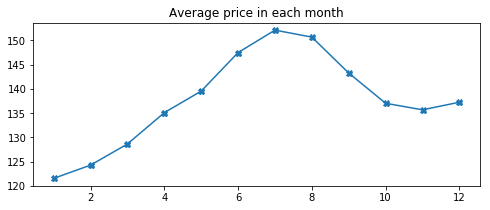

In [169]:
# check price in each month
plt.figure(figsize=(8,3))
plt.plot(month_price,'X-')
plt.title("Average price in each month")
plt.show()

In [172]:
# Final analysis:
# print(high_price_months,low_price_months,active_months,inactive_months)
print("monhts that are active and expensive:",list(set(high_price_months.index) & set(active_months.index)))
print("monhts that are active and cheap:",list(set(low_price_months.index) & set(active_months.index)))
print("monhts that are inactive and expensive:",list(set(high_price_months.index) & set(inactive_months.index)))
print("monhts that are inactive and cheap",list(set(low_price_months.index) & set(inactive_months.index)))

monhts that are active and expensive: []
monhts that are active and cheap: [3]
monhts that are inactive and expensive: [7]
monhts that are inactive and cheap [1, 2]


In [173]:
#Q3: Whhic features will be more helpful in predicting price in that area ?